### Homework 1
#### Anutida Sangkla  ID: 002602236
#### Scalable Data Analytics (MSA 8050) Spring 2021

#### Question 1:

In [1]:
import csv
import collections
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Define generator to iterate data :

In [2]:
def customer_age(filename):
    with open('citibike.csv', 'r') as data:
        reader = csv.DictReader(data)
        for line in reader:
            if  line['usertype'] == 'Subscriber':
                birth_year = line['birth_year']
                if birth_year != "":
                    age = 2015 - int(birth_year)
                    yield age
                    
total = 0
count = {}  
for age in customer_age('citibike.csv'):
    count[age] = count.get(age, 0) + 1
    total += 1

#### The histogram of customers age:

In [3]:
data = {"Age": count.keys(),"Count":count.values()}
df = pd.DataFrame.from_dict(data, orient = 'index')
df = df.transpose()
df.head()

,Age,Count
0,37,1377
1,22,470
2,46,1133
3,30,1673
4,58,449


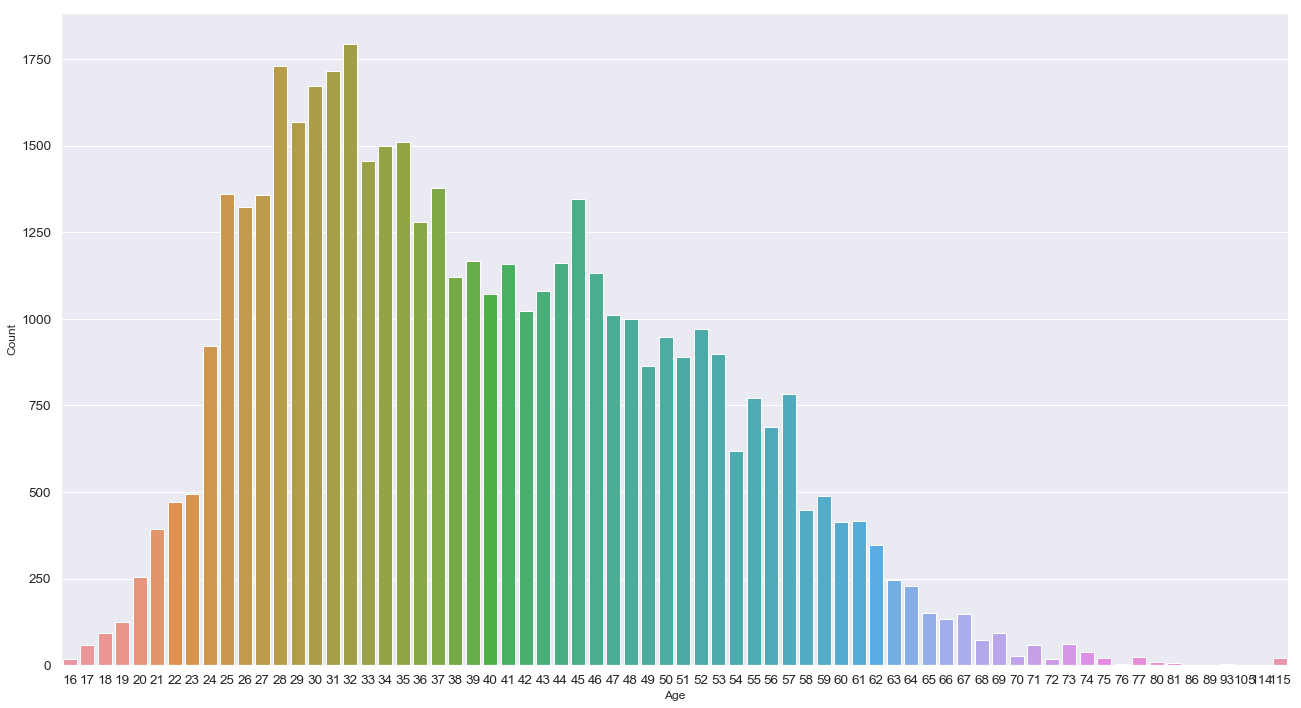

In [5]:
sns.barplot(x = "Age",y="Count",data = df)
plt.xticks(fontsize = 13.5)
plt.yticks(fontsize = 13.5)
sns.set(rc={'figure.figsize':(22,12)})
plt.show()

#### Compute the median age of subscribed customers:

In [6]:
data = list(sorted(count.items()))
median_age = 0
frequency = 0
for k,v in data:
    frequency += v
    if  frequency * 2 > total:
        median_age = k
        break
print (median_age)

38
